# Evaluting Semantic Segmentation and creation of Panoramic image

## Import frameworks

In [1]:
import torch
import kornia
import cv2
import numpy as np
import imutils
from glob import glob
import albumentations as albu
from albumentations.pytorch import ToTensorV2 as ToTensor
from scipy.ndimage import gaussian_filter

from matplotlib import pyplot as plt

from matplotlib.colors import ListedColormap

## Defining ColorMap

In [2]:
def create_cityscapes_colormap():
    colormap = np.zeros((256, 3), dtype=np.uint8)
    colormap[:19, :] = np.array([
        [128, 64, 128],
        [244, 35, 232],
        [70, 70, 70],
        [102, 102, 156],
        [190, 153, 153],
        [153, 153, 153],
        [250, 170, 30],
        [220, 220, 0],
        [107, 142, 35],
        [152, 251, 152],
        [70, 130, 180],
        [220, 20, 60],
        [255, 0, 0],
        [0, 0, 142],
        [0, 0, 70],
        [0, 60, 100],
        [0, 80, 100],
        [0, 0, 230],
        [119, 11, 32]])
    return ListedColormap(colormap / 255., N=256)

## Create Colormap

In [3]:
colormap = create_cityscapes_colormap()

In [4]:
torch.set_grad_enabled(False)

## Import Model

In [5]:
model = torch.jit.load('contextnet14_bdd100k_miou0.503.pth')
#model = model.cuda()
model = model.cpu()

## Import and resize images

In [6]:
imagesDireita = glob('imagens_novas/D-_0039_Camada 51.jpg')
imagesEsquerda = glob('imagens_novas/E-_0039_Camada 51.jpg')
imagesMeio = glob('imagens_novas/M-_0039_Camada 51.jpg')


imgsD = np.stack([ cv2.imread(f) for f in imagesDireita ])
imgsE = np.stack([ cv2.imread(f) for f in imagesEsquerda ])
imgsM = np.stack([ cv2.imread(f) for f in imagesMeio ])


imgsD = np.stack([ cv2.resize(img, (1280,736 )) for img in imgsD ])
imgsE= np.stack([ cv2.resize(img, (1280,736 )) for img in imgsE ])
imgsM = np.stack([ cv2.resize(img, (1280,736 )) for img in imgsM ])

imgsD = imgsD[..., ::-1]
imgsE = imgsE[..., ::-1]
imgsM = imgsM[..., ::-1]

imgsD = imgsD[:, :, ...]
imgsE = imgsE[:, :, ...]
imgsM = imgsM[:, :, ...]

imgsD = imgsD[:, :, ...]
imgsE = imgsE[:, :, ...]
imgsM = imgsM[:, :, ...]

In [7]:
#dimensions = imgsD.shape
#dimensions

## Image transformation

In [8]:
tfms = albu.Compose([
    albu.Normalize(),
    ToTensor(),
])

In [9]:
xD = torch.stack([ tfms(image=image)['image'] for image in imgsD ])
xE = torch.stack([ tfms(image=image)['image'] for image in imgsE ])
xM = torch.stack([ tfms(image=image)['image'] for image in imgsM ])

## Deploying Model

In [87]:
yD = model(xD.cuda()).cpu()
yE = model(xE.cuda()).cpu()
yM = model(xM.cuda()).cpu()

In [10]:
yD = model(xD).cpu()
yE = model(xE).cpu()
yM = model(xM).cpu()

## Manipulate Outputs

In [11]:
classesD = torch.argmax(yD, dim=1)
classesE = torch.argmax(yE, dim=1)
classesM = torch.argmax(yM, dim=1)

print(classesD.shape)
print(imgsD.shape)



print(classesD.shape)


#outputD = 0.5 * (imgsD / 255.) + 0.5 * colormap(classesD)[..., :3]
#outputE = 0.5 * (imgsE / 255.) + 0.5 * colormap(classesE)[..., :3]
#outputM = 0.5 * (imgsM / 255.) + 0.5 * colormap(classesM)[..., :3]
outputD = classesD
outputE = classesE
outputM = classesM

torch.Size([1, 736, 1280])
(1, 736, 1280, 3)
torch.Size([1, 736, 1280])


## Results Visualization

### Segmented Images

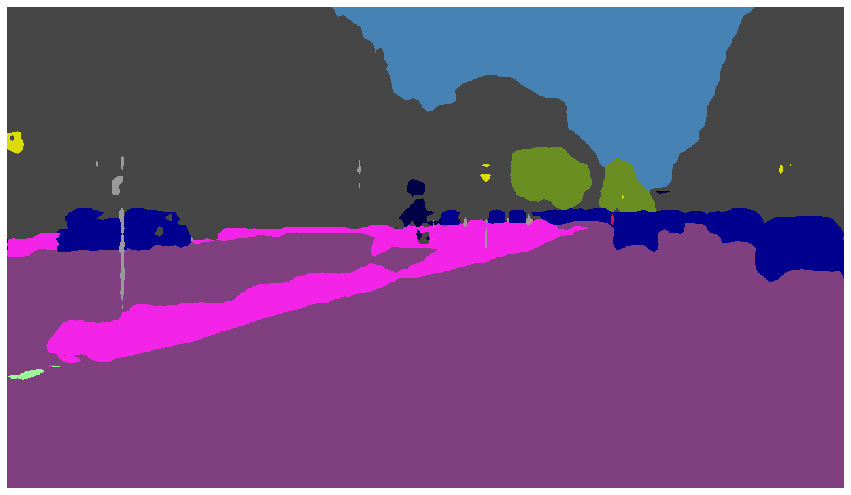

In [12]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(colormap(outputE[0]))
ax.set_axis_off()
#plt.savefig('Seg-E-_0039_Camada 51.jpg', dpi=500)

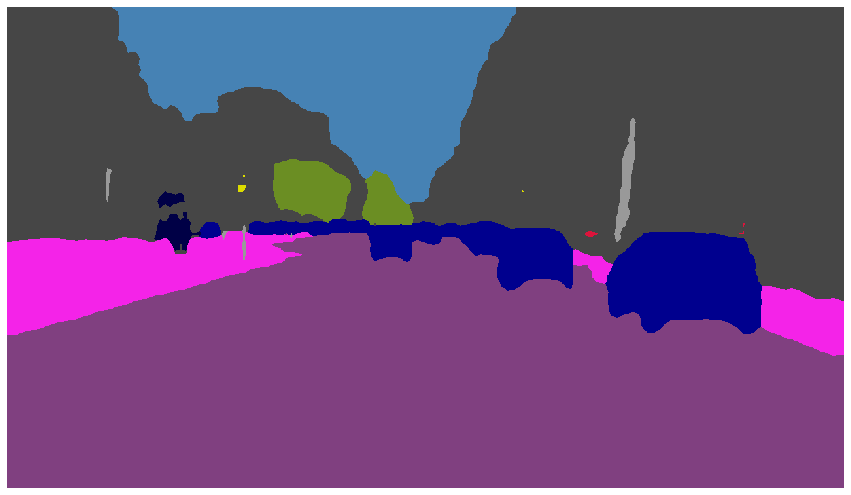

In [13]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(colormap(outputM[0]))
ax.set_axis_off()
#plt.savefig('Seg-M-_0039_Camada 51.jpg', dpi=500)

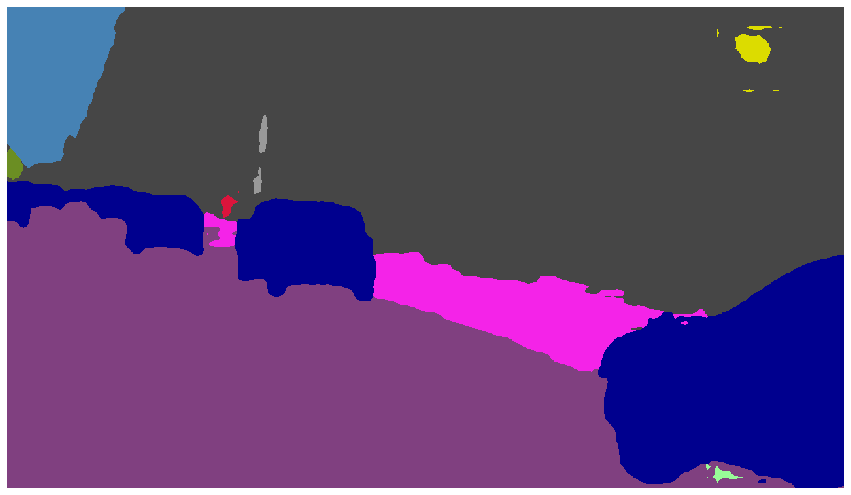

In [14]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(colormap(outputD[0]))
ax.set_axis_off()
#plt.savefig('Seg-D-_0039_Camada 51.jpg', dpi=500)

## Output Manipulation

In [15]:
#outputs = colormap(classes)[..., :3]
outputsD = outputD * 255
outputsE = outputE * 255
outputsM = outputM * 255

outputD = outputD * 255
outputE = outputE * 255
outputM = outputM * 255


#outputsMaskD[(classesD!=0)] = 0.
#outputsMaskD[(classesD==0)] = 255.

#outputsMaskM[(classesM!=0)] = 0.
#outputsMaskM[(classesM==0)] = 255.

#outputsMaskE[(classesE!=0)] = 0.
#outputsMaskE[(classesE==0)] = 255.


outputsD[(classesD!=0)] = 0.
outputsD[(classesD==0)] = 255.

outputsM[(classesM!=0)] = 0.
outputsM[(classesM==0)] = 255.

outputsE[(classesE!=0)] = 0.
outputsE[(classesE==0)] = 255.

#outputsMaskE = classesE * 255
#outputsMaskM = classesM * 255

#D[(classesD==0)] = 255.
#D[(classesD!=0)] = 0.
#outputsD

### Road Detection

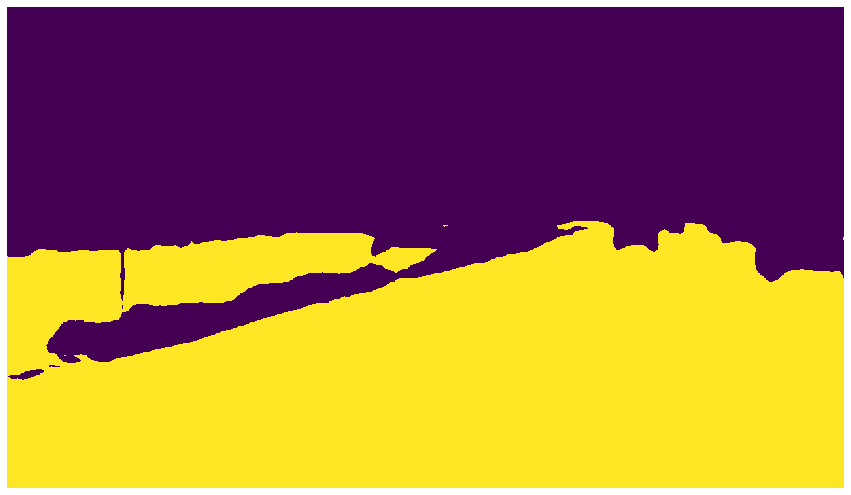

In [23]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(outputsE[0])
ax.set_axis_off()

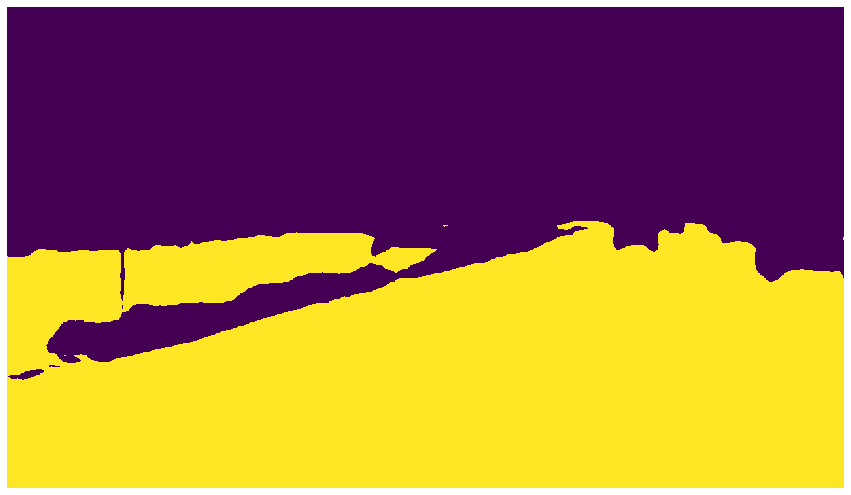

In [24]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(classesE[0]==0)
ax.set_axis_off()

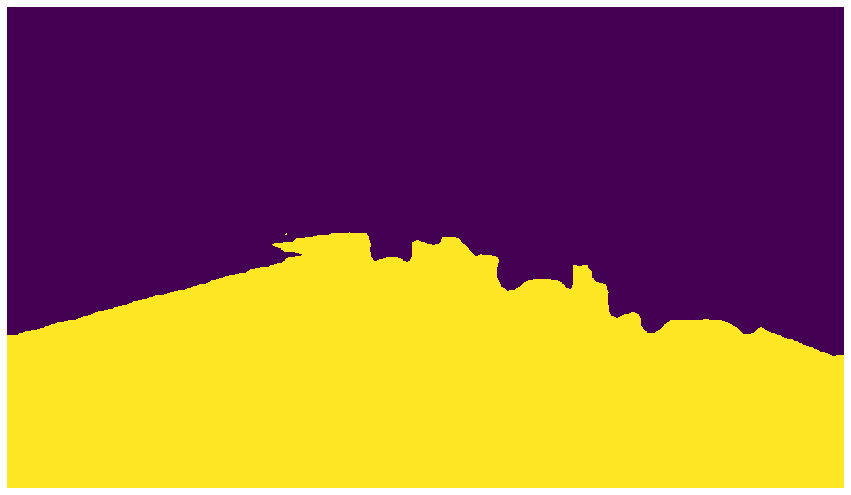

In [25]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(classesM[0]==0)
ax.set_axis_off()

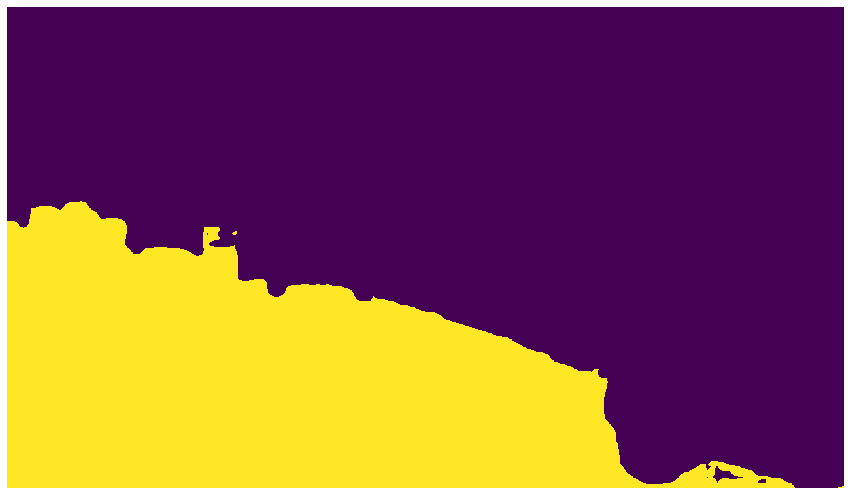

In [26]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(classesD[0]==0)
ax.set_axis_off()

In [105]:
import scipy
from scipy.spatial import ConvexHull, convex_hull_plot_2d

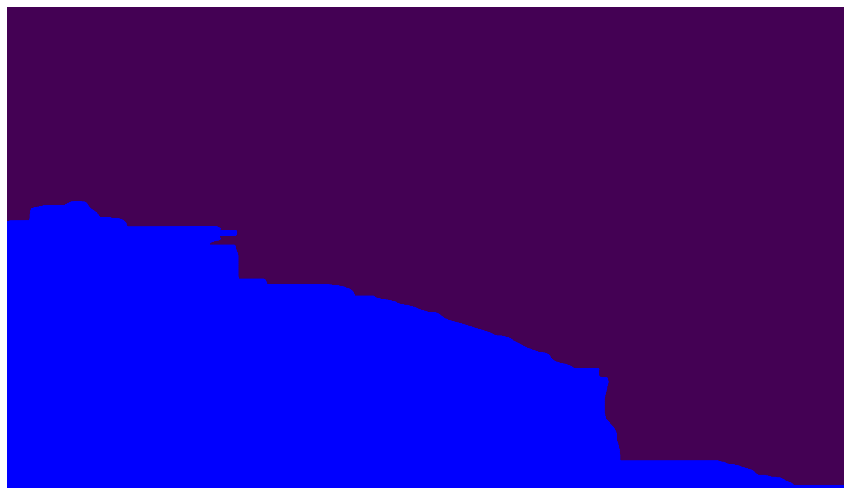

In [106]:
coords = np.column_stack(np.where((classesD[0] == 0)==1))

fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(classesD[0]==0)
ax.set_axis_off()
ax.plot(coords[:,1], coords[:,0], 'b')

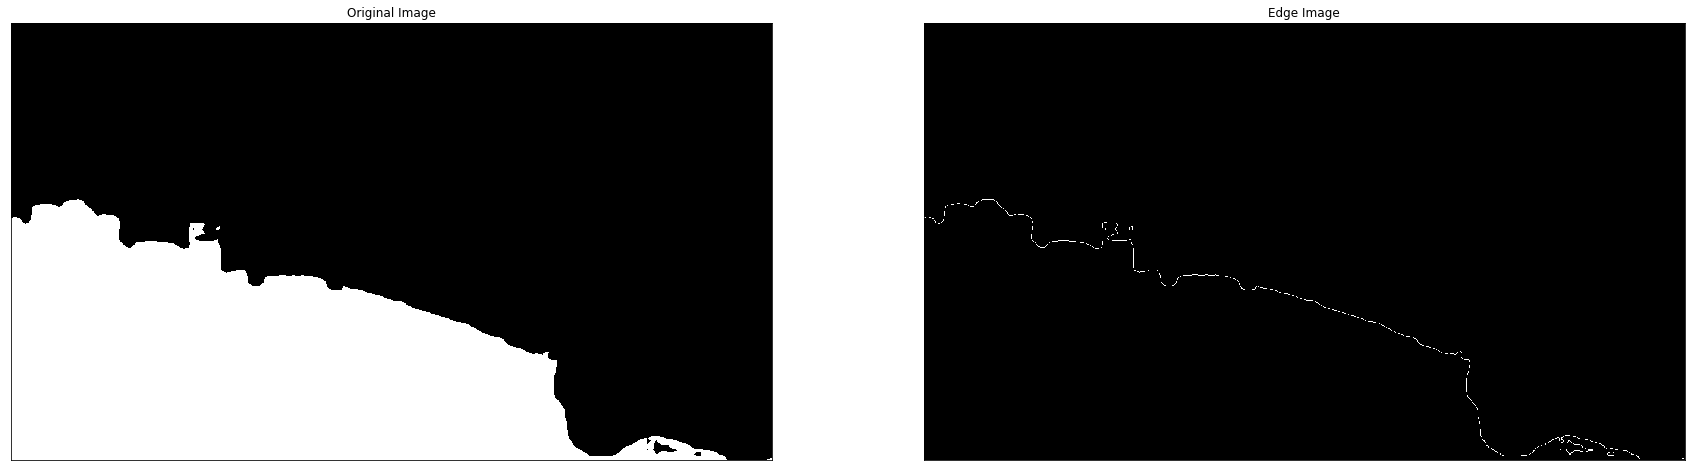

array([[ 297.,  112.],
       [ 298.,   98.],
       [ 298.,   99.],
       ...,
       [ 735., 1204.],
       [ 735., 1271.],
       [ 736.,    0.]])

In [183]:
img = np.uint8(np.float32(classesD[0]==0))

edges = cv2.Canny(img,3,3)

fig, ax = plt.subplots(figsize=(30, 30))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

coords = np.column_stack(np.where(edges==255))
points = np.zeros((len(coords)+1, 2))
points[:len(coords),:]= coords
points[len(coords),0]= 736

points

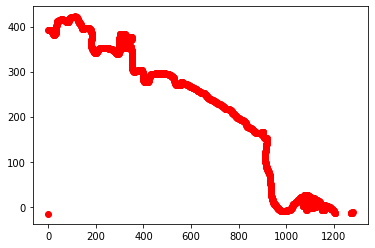

In [184]:
import numpy as np
import matplotlib.pyplot as plt

# define pts from the question
points[:,0]=720-points[:,0]
#points[0,:]=[0,0]
#points[1:,:]=coords

plt.plot(points[:,1], points[:,0], 'ro')
plt.show()


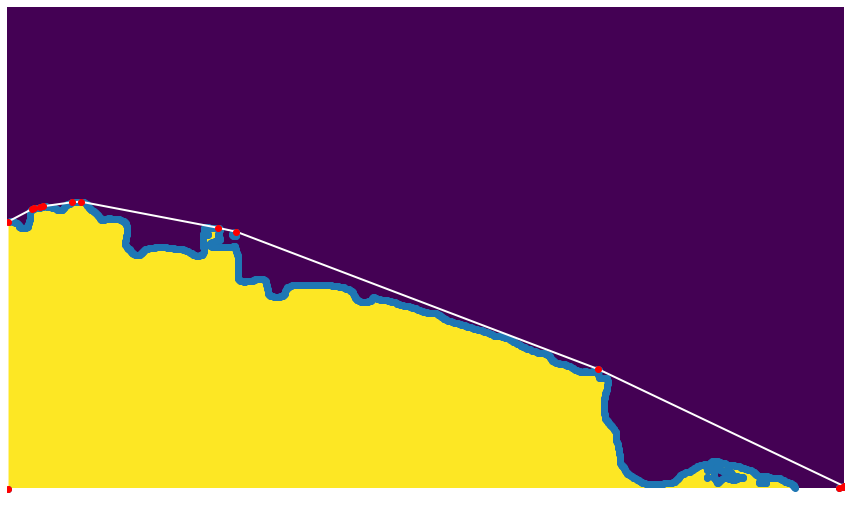

In [185]:
hull= ConvexHull(points)

fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(classesD[0]==0)
ax.set_axis_off()
ax.plot(points[:,1],720-points[:,0], 'o')    
ax.plot(points[hull.vertices,1], 720-points[hull.vertices,0], 'w-', lw=2)
ax.plot(points[hull.vertices[:],1], 720-points[hull.vertices[:],0], 'ro')

In [186]:
Image= classesD[0]==0
hully = np.zeros(Image.shape, np.uint8)
hully = cv2.drawContours(hully, np.array([np.squeeze(hull)]), -1, 255, cv2.FILLED)
idx = hull == 255

Image[idx, :] = Image[idx, :] + (0, 128, 0)
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow('hull', hull)

TypeError: contours data type = 17 is not supported

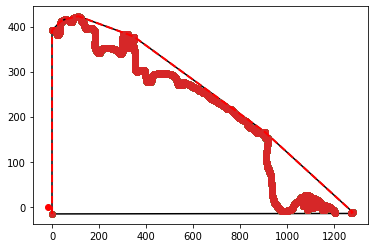

In [201]:
for simplex in hull.simplices:
    plt.plot(points[:,1], points[:,0], 'o')
    plt.plot(points[simplex, 1], points[simplex, 0], 'k-')
plt.plot(points[hull.vertices,1], points[hull.vertices,0], 'r--', lw=2)
plt.plot(points[hull.vertices[0],0], points[hull.vertices[0],1], 'ro')
plt.show()

In [202]:
points[hull.vertices[:]]

array([[ -16.,    0.],
       [ 392.,    0.],
       [ 412.,   38.],
       [ 413.,   41.],
       [ 415.,   50.],
       [ 416.,   55.],
       [ 422.,   98.],
       [ 423.,  112.],
       [ 383.,  322.],
       [ 377.,  350.],
       [ 167.,  903.],
       [ -12., 1279.],
       [ -13., 1277.],
       [ -15., 1271.]])

POLYGON ((0 -16, 0 392, 38 412, 41 413, 50 415, 55 416, 98 422, 112 423, 322 383, 350 377, 903 167, 1279 -12, 1277 -13, 1271 -15, 0 -16))


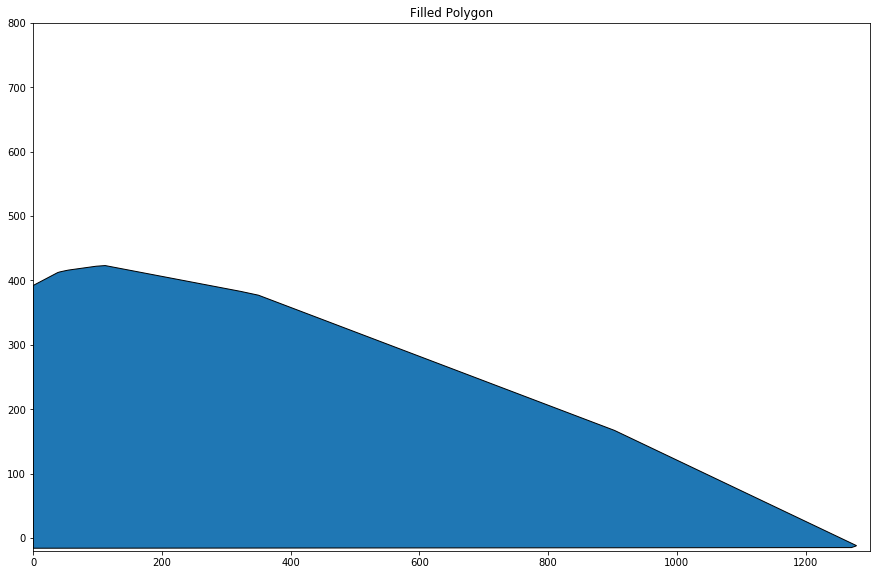

In [206]:
points[hull.vertices[:],0]
points[hull.vertices[:],1]
pointList=[]
from shapely import geometry
from descartes import PolygonPatch
for i in range(14):

    p = geometry.Point(points[hull.vertices[i],1],points[hull.vertices[i],0])
    pointList.append(p)
    
    
poly = geometry.Polygon([[p.x, p.y] for p in pointList])
x,y = poly.exterior.xy
print(poly.wkt) 


fig, ax = plt.subplots(figsize=(15, 15))
ring_patch = PolygonPatch(poly)
ax.add_patch(ring_patch)
ax.set_title('Filled Polygon')
xrange = [0, 1300]
yrange = [-20, 800]
ax.set_xlim(*xrange)
ax.set_ylim(*yrange)
ax.set_aspect(1)

array([[ -16.,    0.],
       [ 392.,    0.],
       [ 412.,   38.],
       [ 413.,   41.],
       [ 415.,   50.],
       [ 416.,   55.],
       [ 422.,   98.],
       [ 423.,  112.],
       [ 383.,  322.],
       [ 377.,  350.],
       [ 167.,  903.],
       [ -12., 1279.],
       [ -13., 1277.],
       [ -15., 1271.]])

In [197]:
pts = points.reshape((-1,2,1))
pts

array([[[ 423.],
        [ 112.]],

       [[ 422.],
        [  98.]],

       [[ 422.],
        [  99.]],

       ...,

       [[ -15.],
        [1204.]],

       [[ -15.],
        [1271.]],

       [[ -16.],
        [   0.]]])

In [207]:
my_img = np.zeros((736, 1280, 3), dtype = "uint8")

pts = points.reshape((-1,2,1))
pts.size
cv2.polylines(my_img,[points[hull.vertices[:]]],True,(255,255,255))

fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(my_img)
ax.set_axis_off()


error: OpenCV(4.1.0) ../modules/imgproc/src/drawing.cpp:2435: error: (-215:Assertion failed) p.checkVector(2, CV_32S) >= 0 in function 'polylines'


# Panoramic Images

## Defining panorama function

In [29]:
class Stitcher:
    def __init__(self):
        self.cachedHlc = None
        self.cachedHrc = None
        
    def stitch(self,Masks,result_width,M_left_center,M_center_right):
        (Maskleft_image, Maskcenter_image, Maskright_image) = Masks
        
        self.cachedHlc = M_left_center
        self.cachedHrc = M_center_right
        
        #result_width = 3200
        T = np.array([[1.0, 0.0, (result_width/2)-(Masks[0].shape[3]/2)],
                      [0.0, 1.0, 0.0],
                      [0.0, 0.0, 1.0]]).astype(dtype=np.float32)
        

        transformations = [self.cachedHlc, np.identity(3, dtype=np.float32), self.cachedHrc]
        #result = np.zeros((Masks[0].shape[0],Masks[0].shape[1],result_width)).astype(np.float32)
        #weights = np.zeros_like(result)
        
        result = 0
        weights = 1e-6
        
        for i in range(len(Masks)):
            warp = kornia.warp_perspective(Masks[i], 
                                       torch.tensor(np.dot(T,transformations[i]),dtype=torch.float32), 
                                       (Masks[i].shape[2],result_width))
            weight = kornia.warp_perspective(torch.tensor(np.ones_like(Masks[i])), 
                                       torch.tensor(np.dot(T,transformations[i]),dtype=torch.float32), 
                                       (Masks[i].shape[2],result_width))
            
            
            #result =  kornia.color.add_weighted(torch.tensor(result),1.0,warp,1.0,0.0)
            #weights = kornia.color.add_weighted(torch.tensor(weights),1.0,weight,1.0,0.0)
            result = warp + result
            weights = weights + weight

        return result / weights
        #return np.uint8(kornia.tensor_to_image(result) / kornia.tensor_to_image(weights))
    
    
    def stitchNormal(self,Masks,result_width,M_left_center,M_center_right):
        (Maskleft_image, Maskcenter_image, Maskright_image) = Masks
        
        self.cachedHlc = M_left_center
        self.cachedHrc = M_center_right
        
        #result_width = 3200
        T = np.array([[1.0, 0.0, (result_width/2)-(Masks[0].shape[1]/2)],
                      [0.0, 1.0, 0.0],
                      [0.0, 0.0, 1.0]]).astype(dtype=np.float32)
        

        transformations = [self.cachedHlc, np.identity(3, dtype=np.float32), self.cachedHrc]
        result = np.zeros((Masks[0].shape[0],Masks[0].shape[1],result_width)).astype(np.float32)
        weights = np.zeros_like(result)
        
        #result = 0
        #weights = 1e-6
        
        for i in range(len(Masks)):
            warp = cv2.warpPerspective(Masks[i], 
                                       np.dot(T,transformations[i]), 
                                       (result_width, Masks[i].shape[0])).astype(np.float32)
            weight = cv2.warpPerspective(np.ones_like(Masks[i]), 
                                       np.dot(T,transformations[i]), 
                                       (result_width, Masks[i].shape[0])).astype(np.float32)
            result =  cv2.addWeighted(result,1.0,warp,1.0,0.0)
            weights = cv2.addWeighted(weights,1.0,weight,1.0,0.0)

        return np.uint8(result / weights)
        #return np.uint8(kornia.tensor_to_image(result) / kornia.tensor_to_image(weights))

    
    
    
    
    def transformationsCalculator(self,images,ratio=0.8, reprojThresh=4.0):
        (image_left, image_center, image_right) = images
        
        (kpsLeft, featuresLeft) = self.detectAndDescribe(image_left)
        (kpsCenter, featuresCenter) = self.detectAndDescribe(image_center)
        (kpsRight, featuresRight) = self.detectAndDescribe(image_right)

        if kpsLeft is None or kpsCenter is None or kpsRight is None:
            print("It was not possible to extract the keypoints")
            return None
        print("Chegou ate aqui")
        M_left_center = self.matchKeypoints(kpsLeft, kpsCenter,featuresLeft, featuresCenter, ratio, reprojThresh)
        M_right_center = self.matchKeypoints(kpsRight, kpsCenter,featuresRight, featuresCenter, ratio, reprojThresh)

        if M_left_center is None or M_right_center is None:
            print("Uma das matrizes nao foi calculada")
            return None
        print("supostamente calculou tudo")
        return (M_left_center[1],M_right_center[1])
    
    def detectAndDescribe(self, image):
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        detector = cv2.ORB_create(nfeatures=1000)
        kps = detector.detect(gray, None)
        (kps,features) = detector.compute(gray, kps)
        kps = np.float32([kp.pt for kp in kps])
        return (kps,features) 
    
    def matchKeypoints(self, kpsA, kpsB, featuresA, featuresB, ratio, reprojThresh):
        matcher = cv2.DescriptorMatcher_create("BruteForce")
        rawMatches = matcher.knnMatch(featuresA, featuresB, 2)
        matches = []
        for m in rawMatches:
            if len(m) == 2 and m[0].distance < m[1].distance * ratio:
                matches.append((m[0].trainIdx, m[0].queryIdx))
        if len(matches) > 15:
            ptsA = np.float32([kpsA[i] for (_, i) in matches])
            ptsB = np.float32([kpsB[i] for (i, _) in matches])
            (H, status) = cv2.findHomography(ptsA, ptsB, cv2.RANSAC,reprojThresh)
            return (matches, H, status)
        return None

In [17]:
def polygonGenerator(image,hullMode):
    import scipy
    from scipy.spatial import ConvexHull, convex_hull_plot_2d
    import numpy as np
    import matplotlib.pyplot as plt
    from shapely import geometry
    from descartes import PolygonPatch
    
    
    #Get coordinates where road was detected
    coords = np.column_stack(np.where((image)==1))

    #Convert the image to grayscale & find edges
    img = np.uint8(np.float32(image))
    edges = cv2.Canny(img,3,3)

    
    #fig, ax = plt.subplots(figsize=(30, 30))
    #plt.subplot(121),plt.imshow(img,cmap = 'gray')
    #plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    #plt.subplot(122),plt.imshow(edges,cmap = 'gray')
    #plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
    #plt.show()
    
    #select the coordinates where the edges where found and define [0,0] as point to close the loop
    coords = np.column_stack(np.where(edges==255))
    points = np.zeros((len(coords)+1, 2))
    points[:len(coords),:]= coords
    points[len(coords),0]= 736
    points[:,0]=720-points[:,0]     # change the axis 


    #plt.plot(points[:,1], points[:,0], 'ro')
    #plt.show()

    if hullMode ==True:
    #Define the hull that best fit the points
        hull= ConvexHull(points)

        fig, ax = plt.subplots(figsize=(15, 15))
        ax.set_title('Convex Hull')
        ax.imshow(image)
        ax.set_axis_off()  
        ax.plot(points[hull.vertices,1], 720-points[hull.vertices,0], 'w-', lw=2)
        ax.plot(points[hull.vertices[:],1], 720-points[hull.vertices[:],0], 'ro')

        pointList=[]
        for i in range(len(hull.vertices[:])):
            p = geometry.Point(points[hull.vertices[i],1],points[hull.vertices[i],0])
            pointList.append(p)
            


        poly = geometry.Polygon([[p.x, p.y] for p in pointList])
        x,y = poly.exterior.xy
        ring_patch = PolygonPatch(poly)
        
        fig, ay = plt.subplots(figsize=(15, 15))
        ay.add_patch(ring_patch)
        ay.set_title('Filled Polygon')
        xrange = [0, 1300]
        yrange = [-20, 800]
        ay.set_xlim(*xrange)
        ay.set_ylim(*yrange)
        ay.set_aspect(1)
        ay.set_axis_off()  
    else:
        fig, ax = plt.subplots(figsize=(15, 15))
        ax.imshow(image)
        ax.set_axis_off()
        ax.plot(points[:,1],720-points[:,0], 'o')    

    return points

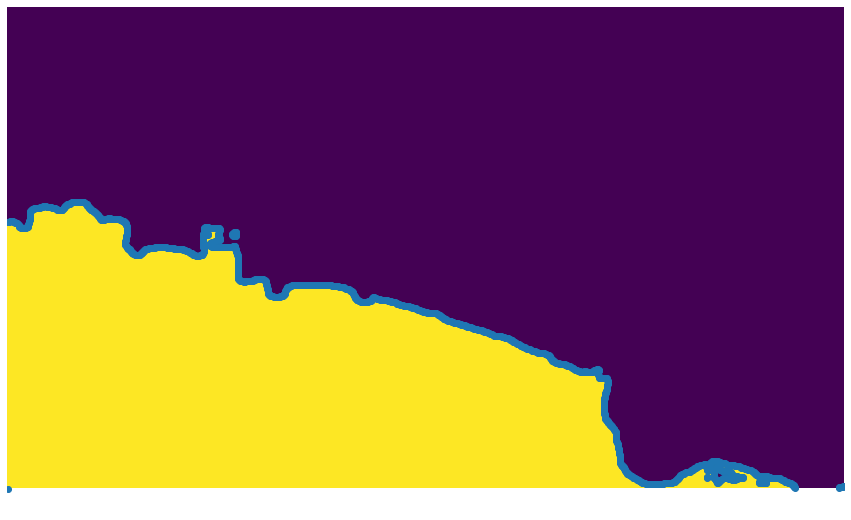

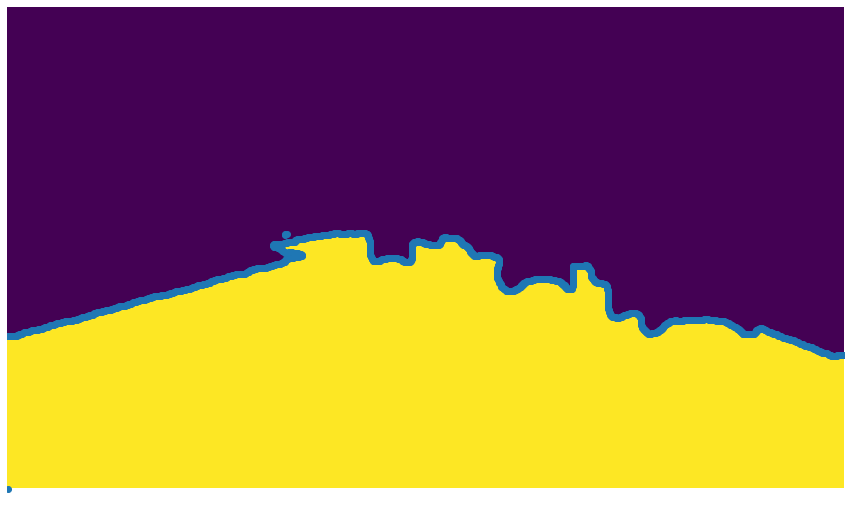

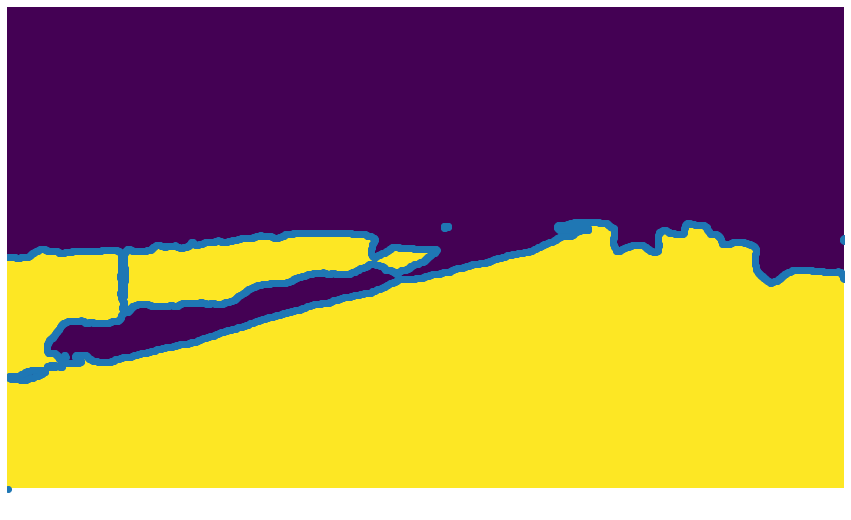

In [87]:
pointsD = polygonGenerator(classesD[0]==0,False)
pointsM = polygonGenerator(classesM[0]==0,False)
pointsE = polygonGenerator(classesE[0]==0,False)



In [78]:
coords

NameError: name 'coords' is not defined

## Panoramic images creation

/home/rubencosta/miniconda3/envs/torch/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if sys.path[0] == '':
/home/rubencosta/miniconda3/envs/torch/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  del sys.path[0]
/home/rubencosta/miniconda3/envs/torch/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


Criei panorâmica só com a estrada


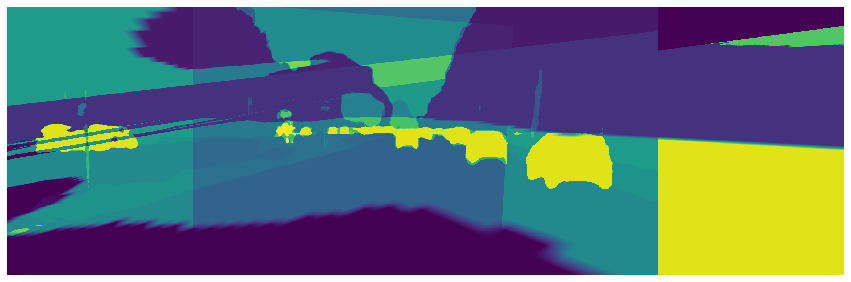

In [23]:
#ic = image_converter()
stitcher = Stitcher()

left_image = imgsE[0]
center_image = imgsM[0]
right_image = imgsD[0]

Segleft_image = outputE[0]
Segcenter_image = outputM[0]
Segright_image = outputD[0]

data: torch.tensor = kornia.image_to_tensor(kornia.tensor_to_image(torch.tensor(Segleft_image)), keepdim=False)  # BxCxHxW
data2: torch.tensor = kornia.image_to_tensor(kornia.tensor_to_image(torch.tensor(Segcenter_image)), keepdim=False)  # BxCxHxW
data3: torch.tensor = kornia.image_to_tensor(kornia.tensor_to_image(torch.tensor(Segright_image)), keepdim=False)  # BxCxHxW
    


Maskleft_image = outputsE[0]
Maskcenter_image = outputsM[0]
Maskright_image = outputsD[0]

#Maskleft_image = outputsMaskE[0]
#Maskcenter_image = outputsMaskM[0]
#Maskright_image = outputsMaskD[0]
    
#if left_image is not None and center_image is not None and right_image is not None:
#    resultPano1 = stitcher.stitch([left_image,center_image, right_image],[left_image,center_image, right_image])
#    if resultPano1 is None:
#        print("There was an error in the stitching procedure")
#    else:
#        print("Criei panorâmica")
#        fig, ax = plt.subplots(figsize=(15, 15))
#        ax.imshow(resultPano1)
#        ax.set_axis_off()
#        plt.savefig('Results/Normal_Context_BDD_503-052.png', dpi=500)
#else:
#    print("Falta as imagens!")

    
#if left_image is not None and center_image is not None and right_image is not None:
#    resultSeg1 = stitcher.stitch([left_image,center_image, right_image],[Segleft_image.float(),Segcenter_image.float(), Segright_image.float()])
#    if resultSeg1 is None:
#        print("There was an error in the stitching procedure")
#    else:
#        print("Criei panorâmica Segmentada")
#        fig, ax = plt.subplots(figsize=(15, 15))
#        ax.imshow(resultSeg1)
#        ax.set_axis_off()
#        plt.savefig('Results/Seg_Context_BDD_503-052.png', dpi=500)
#else:
#    print("Falta as imagens!")

if left_image is not None and center_image is not None and right_image is not None:
    resultMask1 = stitcher.stitch([data.float(),data2.float(), data3.float()],2300,M_left_center,M_center_right)
    if resultMask1 is None:
        print("There was an error in the stitching procedure")
    else:
        print("Criei panorâmica só com a estrada")
        fig, ax = plt.subplots(figsize=(15, 15))
        ax.imshow(resultMask1[-1,-1])
        ax.set_axis_off()
        #plt.savefig('Results/Mask_Context_BDD_503-052.png', dpi=500)
else:
    print("Falta as imagens!")
    

In [25]:
resultMask1/255

tensor([[[[ 7.5000,  7.5000,  7.5000,  ...,  0.0000,  0.0000,  0.0000],
          [ 7.5000,  7.5000,  7.5000,  ...,  0.0000,  0.0000,  0.0000],
          [ 7.5000,  7.5000,  7.5000,  ...,  0.0000,  0.0000,  0.0000],
          ...,
          [ 0.0000,  0.0000,  0.0000,  ..., 13.0000, 13.0000, 13.0000],
          [ 0.0000,  0.0000,  0.0000,  ..., 13.0000, 13.0000, 13.0000],
          [ 0.0000,  0.0000,  0.0000,  ..., 13.0000, 13.0000, 13.0000]]]])

## Panoramic images creation (Equal but for other pics)

In [31]:
#ic = image_converter()
stitcher = Stitcher()

left_image = imgsE[0]
center_image = imgsM[0]
right_image = imgsD[0]

Segleft_image = outputE[0]
Segcenter_image = outputM[0]
Segright_image = outputD[0]

Maskleft_image = outputsE[0]
Maskcenter_image = outputsM[0]
Maskright_image = outputsD[0]

#Maskleft_image = outputsMaskE[0]
#Maskcenter_image = outputsMaskM[0]
#Maskright_image = outputsMaskD[0]

    
if left_image is not None and center_image is not None and right_image is not None:
    resultPano2 = stitcher.stitchNormal([left_image,center_image, right_image],2300,M_left_center,M_center_right)
    if resultPano2 is None:
        print("There was an error in the stitching procedure")
    else:
        print("Criei panorâmica")
        fig, ax = plt.subplots(figsize=(15, 15))
        ax.imshow(resultPano2)
        ax.set_axis_off()
else:
    print("Falta as imagens!")

    
if left_image is not None and center_image is not None and right_image is not None:
    resultSeg2 = stitcher.stitchNormal([Segleft_image,Segcenter_image, Segright_image],2300,M_left_center,M_center_right)
    if resultSeg2 is None:
        print("There was an error in the stitching procedure")
    else:
        print("Criei panorâmica Segmentada")
        fig, ax = plt.subplots(figsize=(15, 15))
        ax.imshow(resultSeg2)
        ax.set_axis_off()
else:
    print("Falta as imagens!")

if left_image is not None and center_image is not None and right_image is not None:
    resultMask2 = stitcher.stitchNormal([Maskleft_image,Maskcenter_image, Maskright_image],2300,M_left_center,M_center_right)
    if resultMask2 is None:
        print("There was an error in the stitching procedure")
    else:
        print("Criei panorâmica só com a estrada")
        fig, ax = plt.subplots(figsize=(15, 15))
        ax.imshow(resultMask2)
        ax.set_axis_off()
else:
    print("Falta as imagens!")
    

NameError: name 'images' is not defined

## Panoramic images creation (Equal but for other pics)

In [30]:
#ic = image_converter()
stitcher = Stitcher()

left_image = imgsE[0]
center_image = imgsM[0]
right_image = imgsD[0]

Segleft_image = outputE[0]
Segcenter_image = outputM[0]
Segright_image = outputD[0]

Maskleft_image = outputsE[0]
Maskcenter_image = outputsM[0]
Maskright_image = outputsD[0]

#Maskleft_image = outputsMaskE[0]
#Maskcenter_image = outputsMaskM[0]
#Maskright_image = outputsMaskD[0]

(M_left_center, M_center_right) =stitcher.transformationsCalculator([left_image,center_image, right_image],ratio=0.8, reprojThresh=4.0)
    
if left_image is not None and center_image is not None and right_image is not None:
    resultPano1 = stitcher.stitch([left_image,center_image, right_image],[left_image,center_image, right_image])
    if resultPano1 is None:
        print("There was an error in the stitching procedure")
    else:
        print("Criei panorâmica")
        fig, ax = plt.subplots(figsize=(15, 15))
        ax.imshow(resultPano1)
        ax.set_axis_off()
else:
    print("Falta as imagens!")

    
if left_image is not None and center_image is not None and right_image is not None:
    resultSeg1 = stitcher.stitch([left_image,center_image, right_image],[Segleft_image,Segcenter_image, Segright_image])
    if resultSeg1 is None:
        print("There was an error in the stitching procedure")
    else:
        print("Criei panorâmica Segmentada")
        fig, ax = plt.subplots(figsize=(15, 15))
        ax.imshow(resultSeg1)
        ax.set_axis_off()
else:
    print("Falta as imagens!")

if left_image is not None and center_image is not None and right_image is not None:
    resultMask1 = stitcher.stitch([left_image,center_image, right_image],[Maskleft_image,Maskcenter_image, Maskright_image])
    if resultMask1 is None:
        print("There was an error in the stitching procedure")
    else:
        print("Criei panorâmica só com a estrada")
        fig, ax = plt.subplots(figsize=(15, 15))
        ax.imshow(resultMask1)
        ax.set_axis_off()
else:
    print("Falta as imagens!")
    

Chegou ate aqui
supostamente calculou tudo


TypeError: stitch() missing 2 required positional arguments: 'M_left_center' and 'M_center_right'

## Panoramic Road 

In [33]:
#dst = gaussian_filter(resultMask, sigma=50)
# blur image

kernel = np.ones((30,30),np.uint8)


dst = cv2.blur(resultMask1,(30,30))
# apply a threshold
dst = cv2.threshold(dst, 100 , 255, cv2.THRESH_BINARY)
dst = dst[1]

dst =cv2.morphologyEx(dst, cv2.MORPH_OPEN, kernel)
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(dst)
ax.set_axis_off()

NameError: name 'resultMask1' is not defined